In [13]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import iqr
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon, chisquare

control = pd.read_csv("data/control.csv")
ssml = pd.read_csv("data/with_SSML.csv")

mapping_dict = {
    'Please rate the arousal level on a scale of low, mid, and high.': 'arousal',
    'Please rate the valence(pleasure) level on a scale of negative, neutral, and positive.': 'valence'
    # Add all mappings here
}

arousal_mapping = {
    'Mid': 1,
    'Low': 2,
    'High': 3,
    'Hight': 3
}

valence_mapping = {
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3
}

control.rename(columns=mapping_dict, inplace=True)
control.replace(valence_mapping, inplace=True)
control.replace(arousal_mapping, inplace=True)

ssml.rename(columns=mapping_dict, inplace=True)
ssml.replace(valence_mapping, inplace=True)
ssml.replace(arousal_mapping, inplace=True)


C:\Users\wilia\AppData\Local\Temp\ipykernel_17676\4044176831.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  control.replace(valence_mapping, inplace=True)
C:\Users\wilia\AppData\Local\Temp\ipykernel_17676\4044176831.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  control.replace(arousal_mapping, inplace=True)
C:\Users\wilia\AppData\Local\Temp\ipykernel_17676\4044176831.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly cal

# Shapiro Wilk-Test

In [14]:
# Shapiro Wilk Test

print("starting test for normality for Control: ")

for item in control: 
    if item == "Timestamp":
        continue
    
    item_shapiro = shapiro(control[item])
    print(str(item) + ": " + str(item_shapiro))


print("starting test for normality for SSML: ")

    
for item in ssml: 
    if item == "Timestamp":
        continue
    
    item_shapiro = shapiro(ssml[item])
    print(str(item) + ": " + str(item_shapiro))



starting test for normality for Control: 
arousal: ShapiroResult(statistic=0.7741801317842104, pvalue=0.000493424614170689)
valence: ShapiroResult(statistic=0.7513420736888179, pvalue=0.0002435390527366746)
starting test for normality for SSML: 
arousal: ShapiroResult(statistic=0.7365334000911927, pvalue=0.00021942171925374128)
valence: ShapiroResult(statistic=0.7259144283860948, pvalue=0.0001624193777226807)


# check for significance 

lets go brothers 

In [15]:
ssml_both = ttest_ind(ssml['valence'], control['valence'])
print(ssml_both)

ssml_both = ttest_ind(ssml['arousal'], control['arousal'])
print(ssml_both)

stat, p = wilcoxon(ssml['arousal'], control['arousal'])
print(f"Wilcoxon Test Statistic: {stat}, p-value: {p}")

# Mann-Whitney U Test (non-parametric, independent)
u_stat, u_p = mannwhitneyu(ssml['valence'], control['valence'])
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {u_p}")

u_stat, u_p = mannwhitneyu(ssml['arousal'], control['arousal'])
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {u_p}")




TtestResult(statistic=0.36504108552950504, pvalue=0.7172774156594295, df=35.0)
TtestResult(statistic=0.7236088013023513, pvalue=0.4741147499897932, df=35.0)
Mann-Whitney U Test: U-statistic = 179.5, p-value = 0.7841909516517825
Mann-Whitney U Test: U-statistic = 191.0, p-value = 0.5235671028347084


C:\Users\wilia\AppData\Local\Temp\ipykernel_17676\3233386441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Condition', y='Score', inner='box', palette='muted')


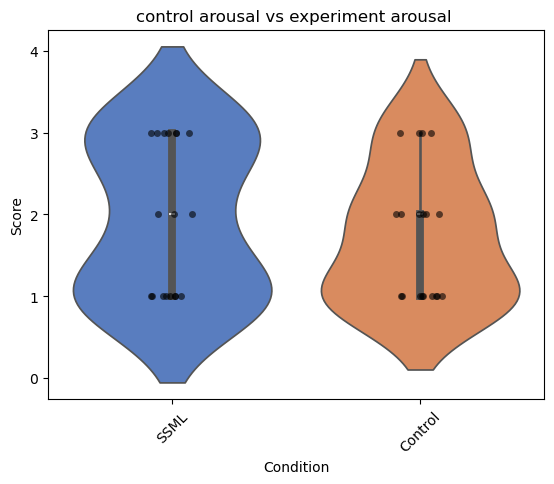

In [16]:
# Combine all DataFrames
combined_df = pd.DataFrame({
    'Score': ssml['arousal'].tolist() + control['arousal'].tolist(),
    'Condition': ['SSML'] * len(ssml['arousal']) + ['Control'] * len(control['arousal'])
})

# Ensure the columns are named appropriately
#combined_df = combined_df.rename(columns={combined_df.columns[0]: 'Score'})

# Create a boxplot
sns.violinplot(data=combined_df, x='Condition', y='Score', inner='box', palette='muted')


# Add individual data points
sns.stripplot(data=combined_df, x='Condition', y='Score', color='black', alpha=0.6, jitter=True)

# Customize the plot
plt.title('control arousal vs experiment arousal ')
plt.xlabel('Condition')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

C:\Users\wilia\AppData\Local\Temp\ipykernel_17676\2237783107.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='Condition', y='Score', inner='box', palette='muted')


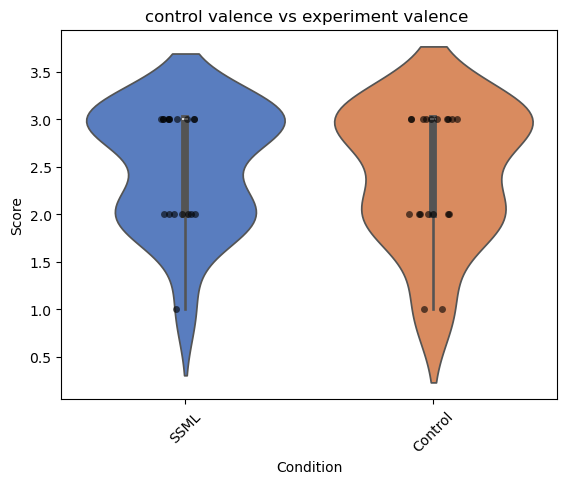

In [17]:
# Combine all DataFrames
combined_df = pd.DataFrame({
    'Score': ssml['valence'].tolist() + control['valence'].tolist(),
    'Condition': ['SSML'] * len(ssml['valence']) + ['Control'] * len(control['valence'])
})

# Ensure the columns are named appropriately
#combined_df = combined_df.rename(columns={combined_df.columns[0]: 'Score'})

# Create a boxplot
sns.violinplot(data=combined_df, x='Condition', y='Score', inner='box', palette='muted')


# Add individual data points
sns.stripplot(data=combined_df, x='Condition', y='Score', color='black', alpha=0.6, jitter=True)

# Customize the plot
plt.title('control valence vs experiment valence ')
plt.xlabel('Condition')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()